In [2]:
import scanpy as sc
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"

#设定显示图片的分辨率
#%config InlineBackend.figure_format = 'png'
#%config InlineBackend.figure_format = 'svg'
%config InlineBackend.figure_format = 'retina'

sc.settings.set_figure_params(dpi=100, dpi_save=300, figsize=(5, 5))

In [4]:
pbmc = sc.datasets.pbmc68k_reduced()
pbmc

AnnData object with n_obs × n_vars = 700 × 765
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [4]:
pbmc.obs.bulk_labels

index
AAAGCCTGGCTAAC-1     CD14+ Monocyte
AAATTCGATGCACA-1          Dendritic
AACACGTGGTCTTT-1           CD56+ NK
AAGTGCACGTGCTA-1    CD4+/CD25 T Reg
ACACGAACGGAGTG-1          Dendritic
                         ...       
TGGCACCTCCAACA-8          Dendritic
TGTGAGTGCTTTAC-8          Dendritic
TGTTACTGGCGATT-8    CD4+/CD25 T Reg
TTCAGTACCGGGAA-8            CD19+ B
TTGAGGTGGAGAGC-8          Dendritic
Name: bulk_labels, Length: 700, dtype: category
Categories (10, object): ['CD4+/CD25 T Reg', 'CD4+/CD45RA+/CD25- Naive T', 'CD4+/CD45RO+ Memory', 'CD8+ Cytotoxic T', ..., 'CD19+ B', 'CD34+', 'CD56+ NK', 'Dendritic']

In [5]:
pbmc.obs.louvain

index
AAAGCCTGGCTAAC-1    1
AAATTCGATGCACA-1    1
AACACGTGGTCTTT-1    3
AAGTGCACGTGCTA-1    9
ACACGAACGGAGTG-1    2
                   ..
TGGCACCTCCAACA-8    2
TGTGAGTGCTTTAC-8    1
TGTTACTGGCGATT-8    0
TTCAGTACCGGGAA-8    4
TTGAGGTGGAGAGC-8    2
Name: louvain, Length: 700, dtype: category
Categories (11, object): ['0', '1', '2', '3', ..., '7', '8', '9', '10']

In [7]:
pbmc.var

n_counts     means  dispersions  dispersions_norm  highly_variable
index                                                                         
HES4     1153.387451  0.592365     2.028047          2.771764             True
TNFRSF4   304.358154  0.193332     1.760724          2.746426             True
SSU72    2530.272705  1.019981     1.208284         -0.631160            False
PARK7    7451.664062  1.828078     1.288261         -0.544716            False
RBP7      272.811035  0.174943     1.842789          3.192285             True
...              ...       ...          ...               ...              ...
SUMO3    2008.512939  0.878592     1.412841          0.174762            False
ITGB2    7413.487793  1.823767     1.596550         -0.137714            False
S100B     645.737549  0.373296     2.331789          5.554084             True
PRMT2    2062.443848  0.894168     1.273153         -0.375588            False
MT-ND3   1214.914185  0.615929     1.265916         -0.326537            False

[765 rows x 5 columns]

### 基因表达展示

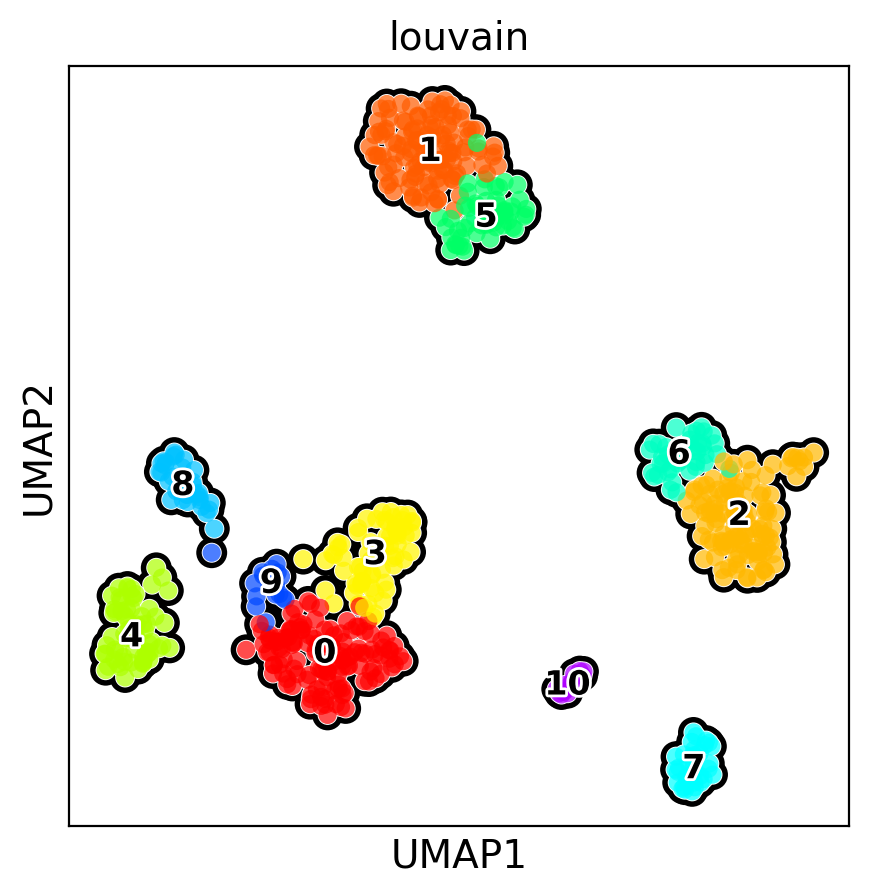

In [6]:
# 亚群美化
sc.pl.umap(pbmc,color='louvain',palette={'0':"#FF0000",'1':"#FF5C00" ,'2':"#FFB800",
          '3':"#FFF500",'4':"#ADFF00",'5':"#00FF66",
          '6':"#00FFC2",'7':"#00FFFF",'8':"#00C2FF",
          '9':"#0047FF", '10':"#AD00FF"},legend_loc='on data',add_outline=True,legend_fontsize=12,legend_fontoutline=2)

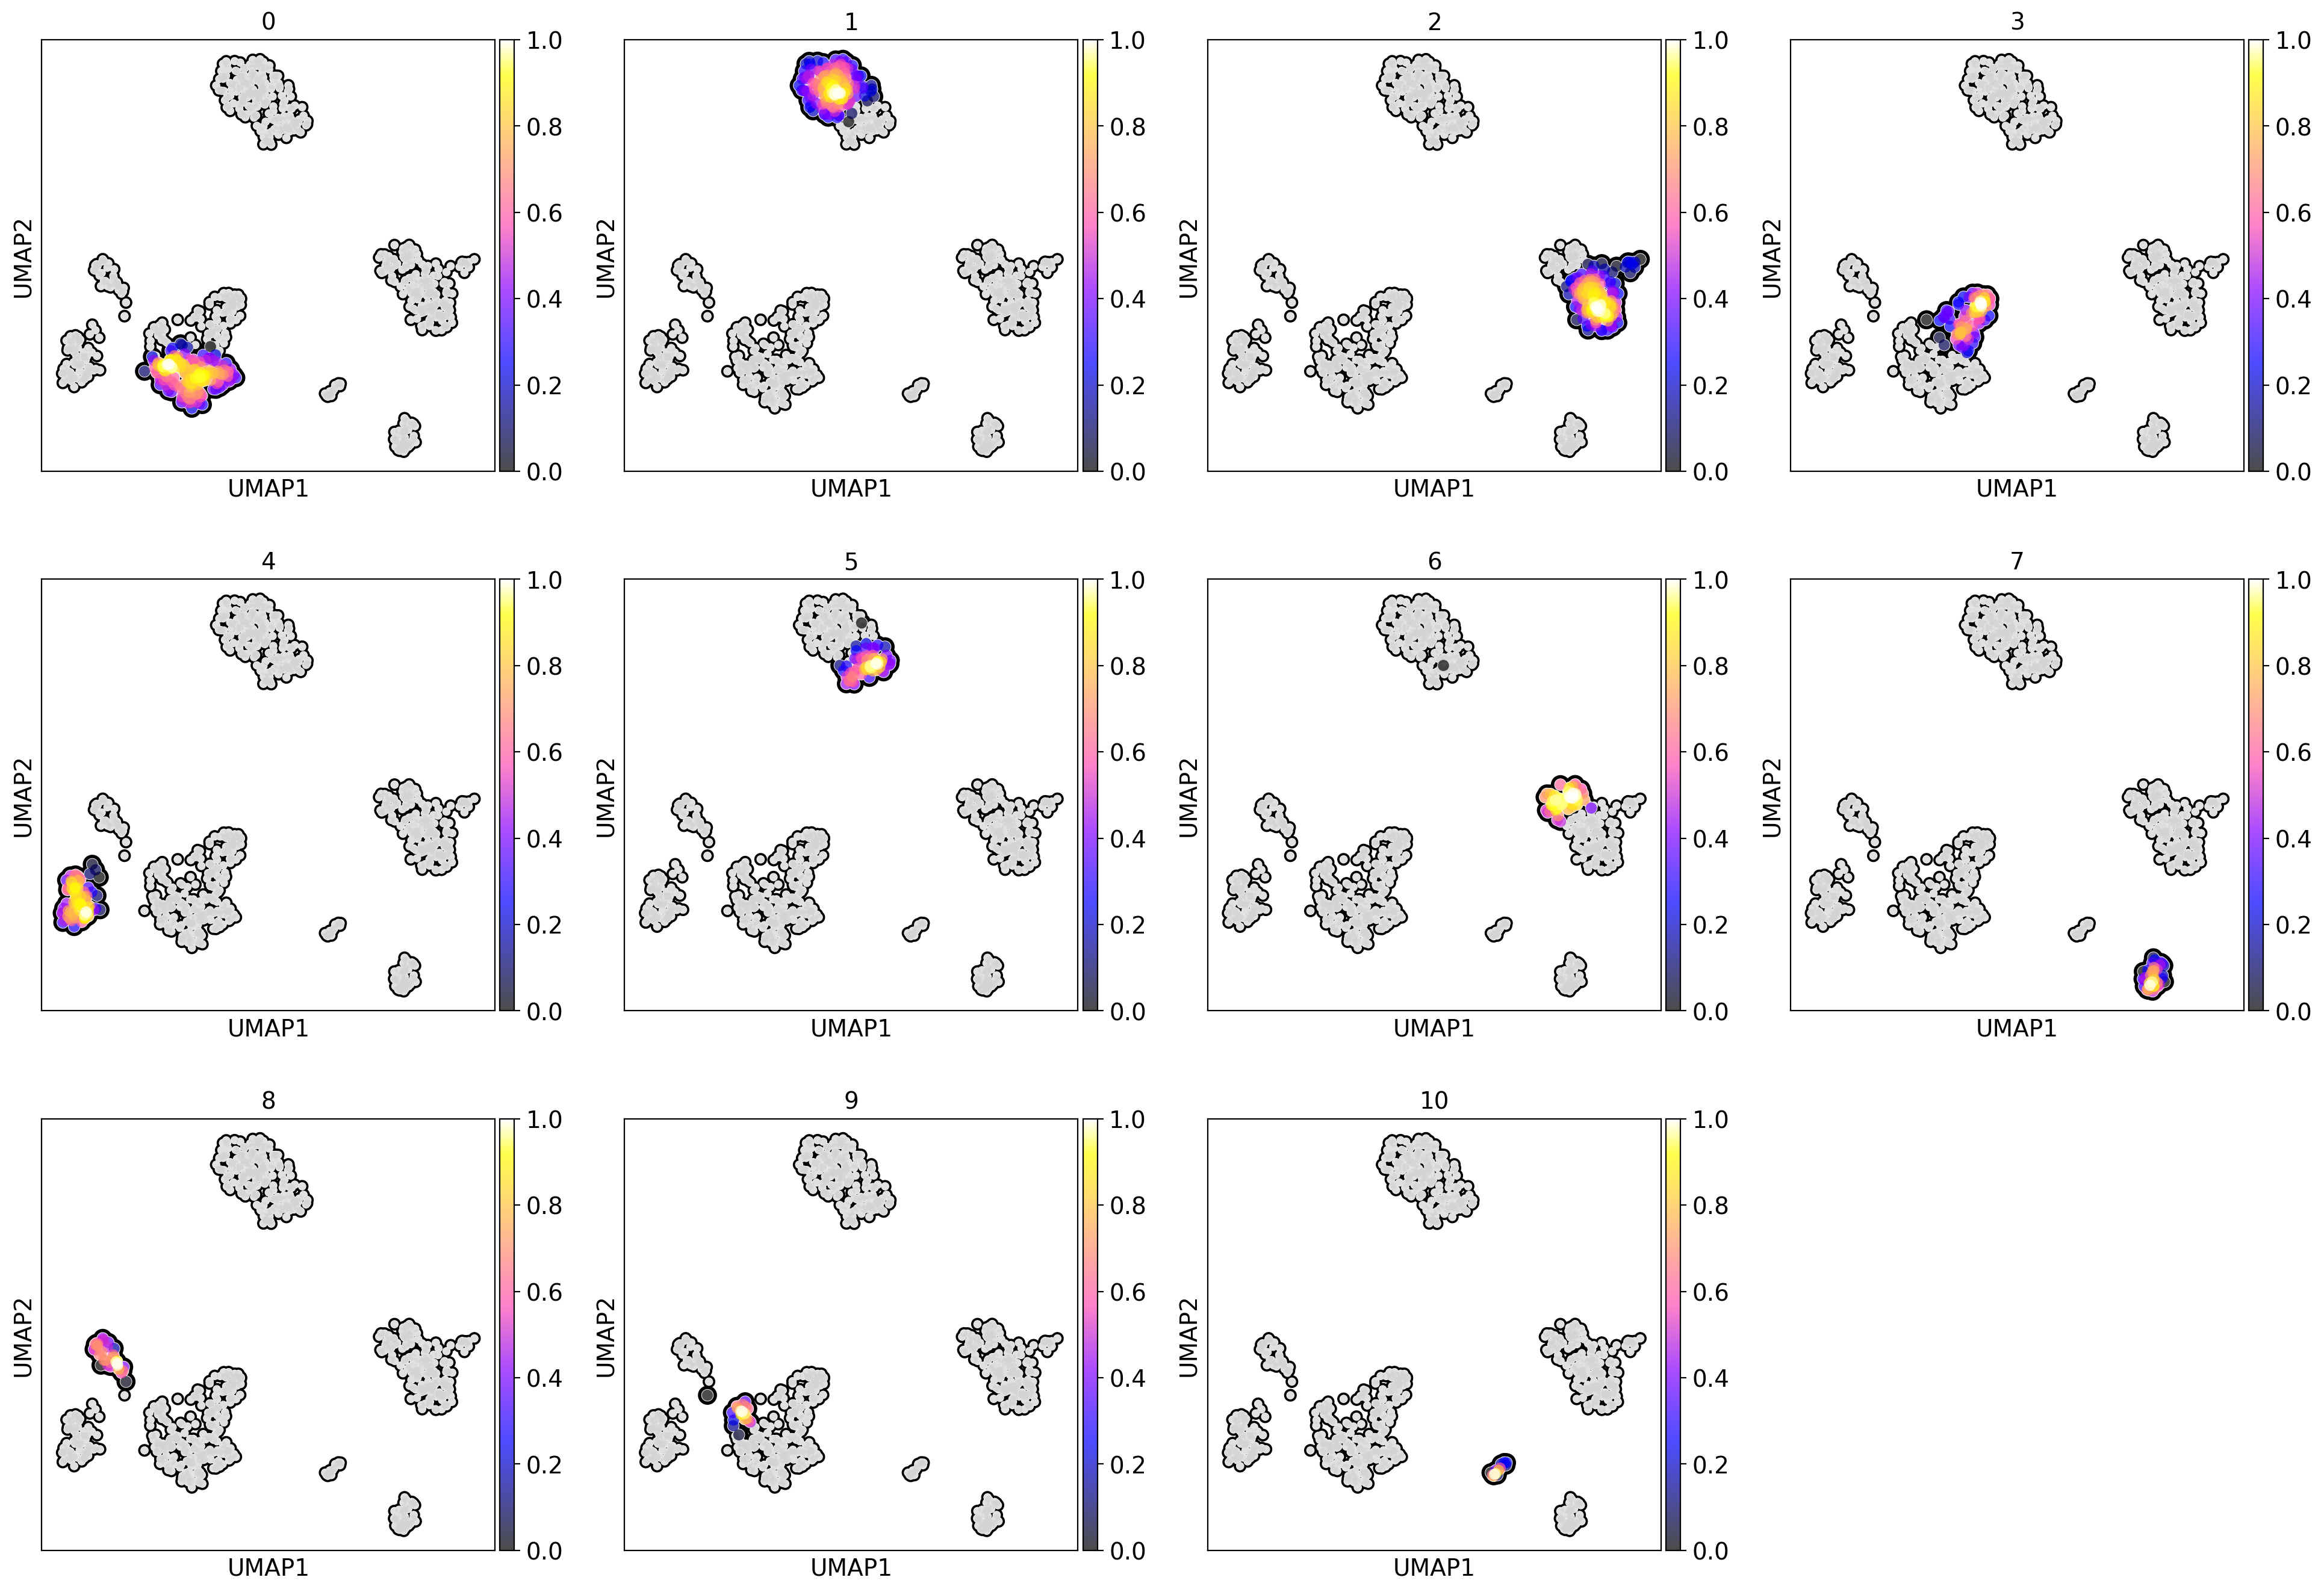

In [9]:
#查看每个细胞亚群的密集程度
sc.tl.embedding_density(pbmc,groupby='louvain')
sc.pl.embedding_density(pbmc,groupby='louvain',color_map='gnuplot2', add_outline=True)

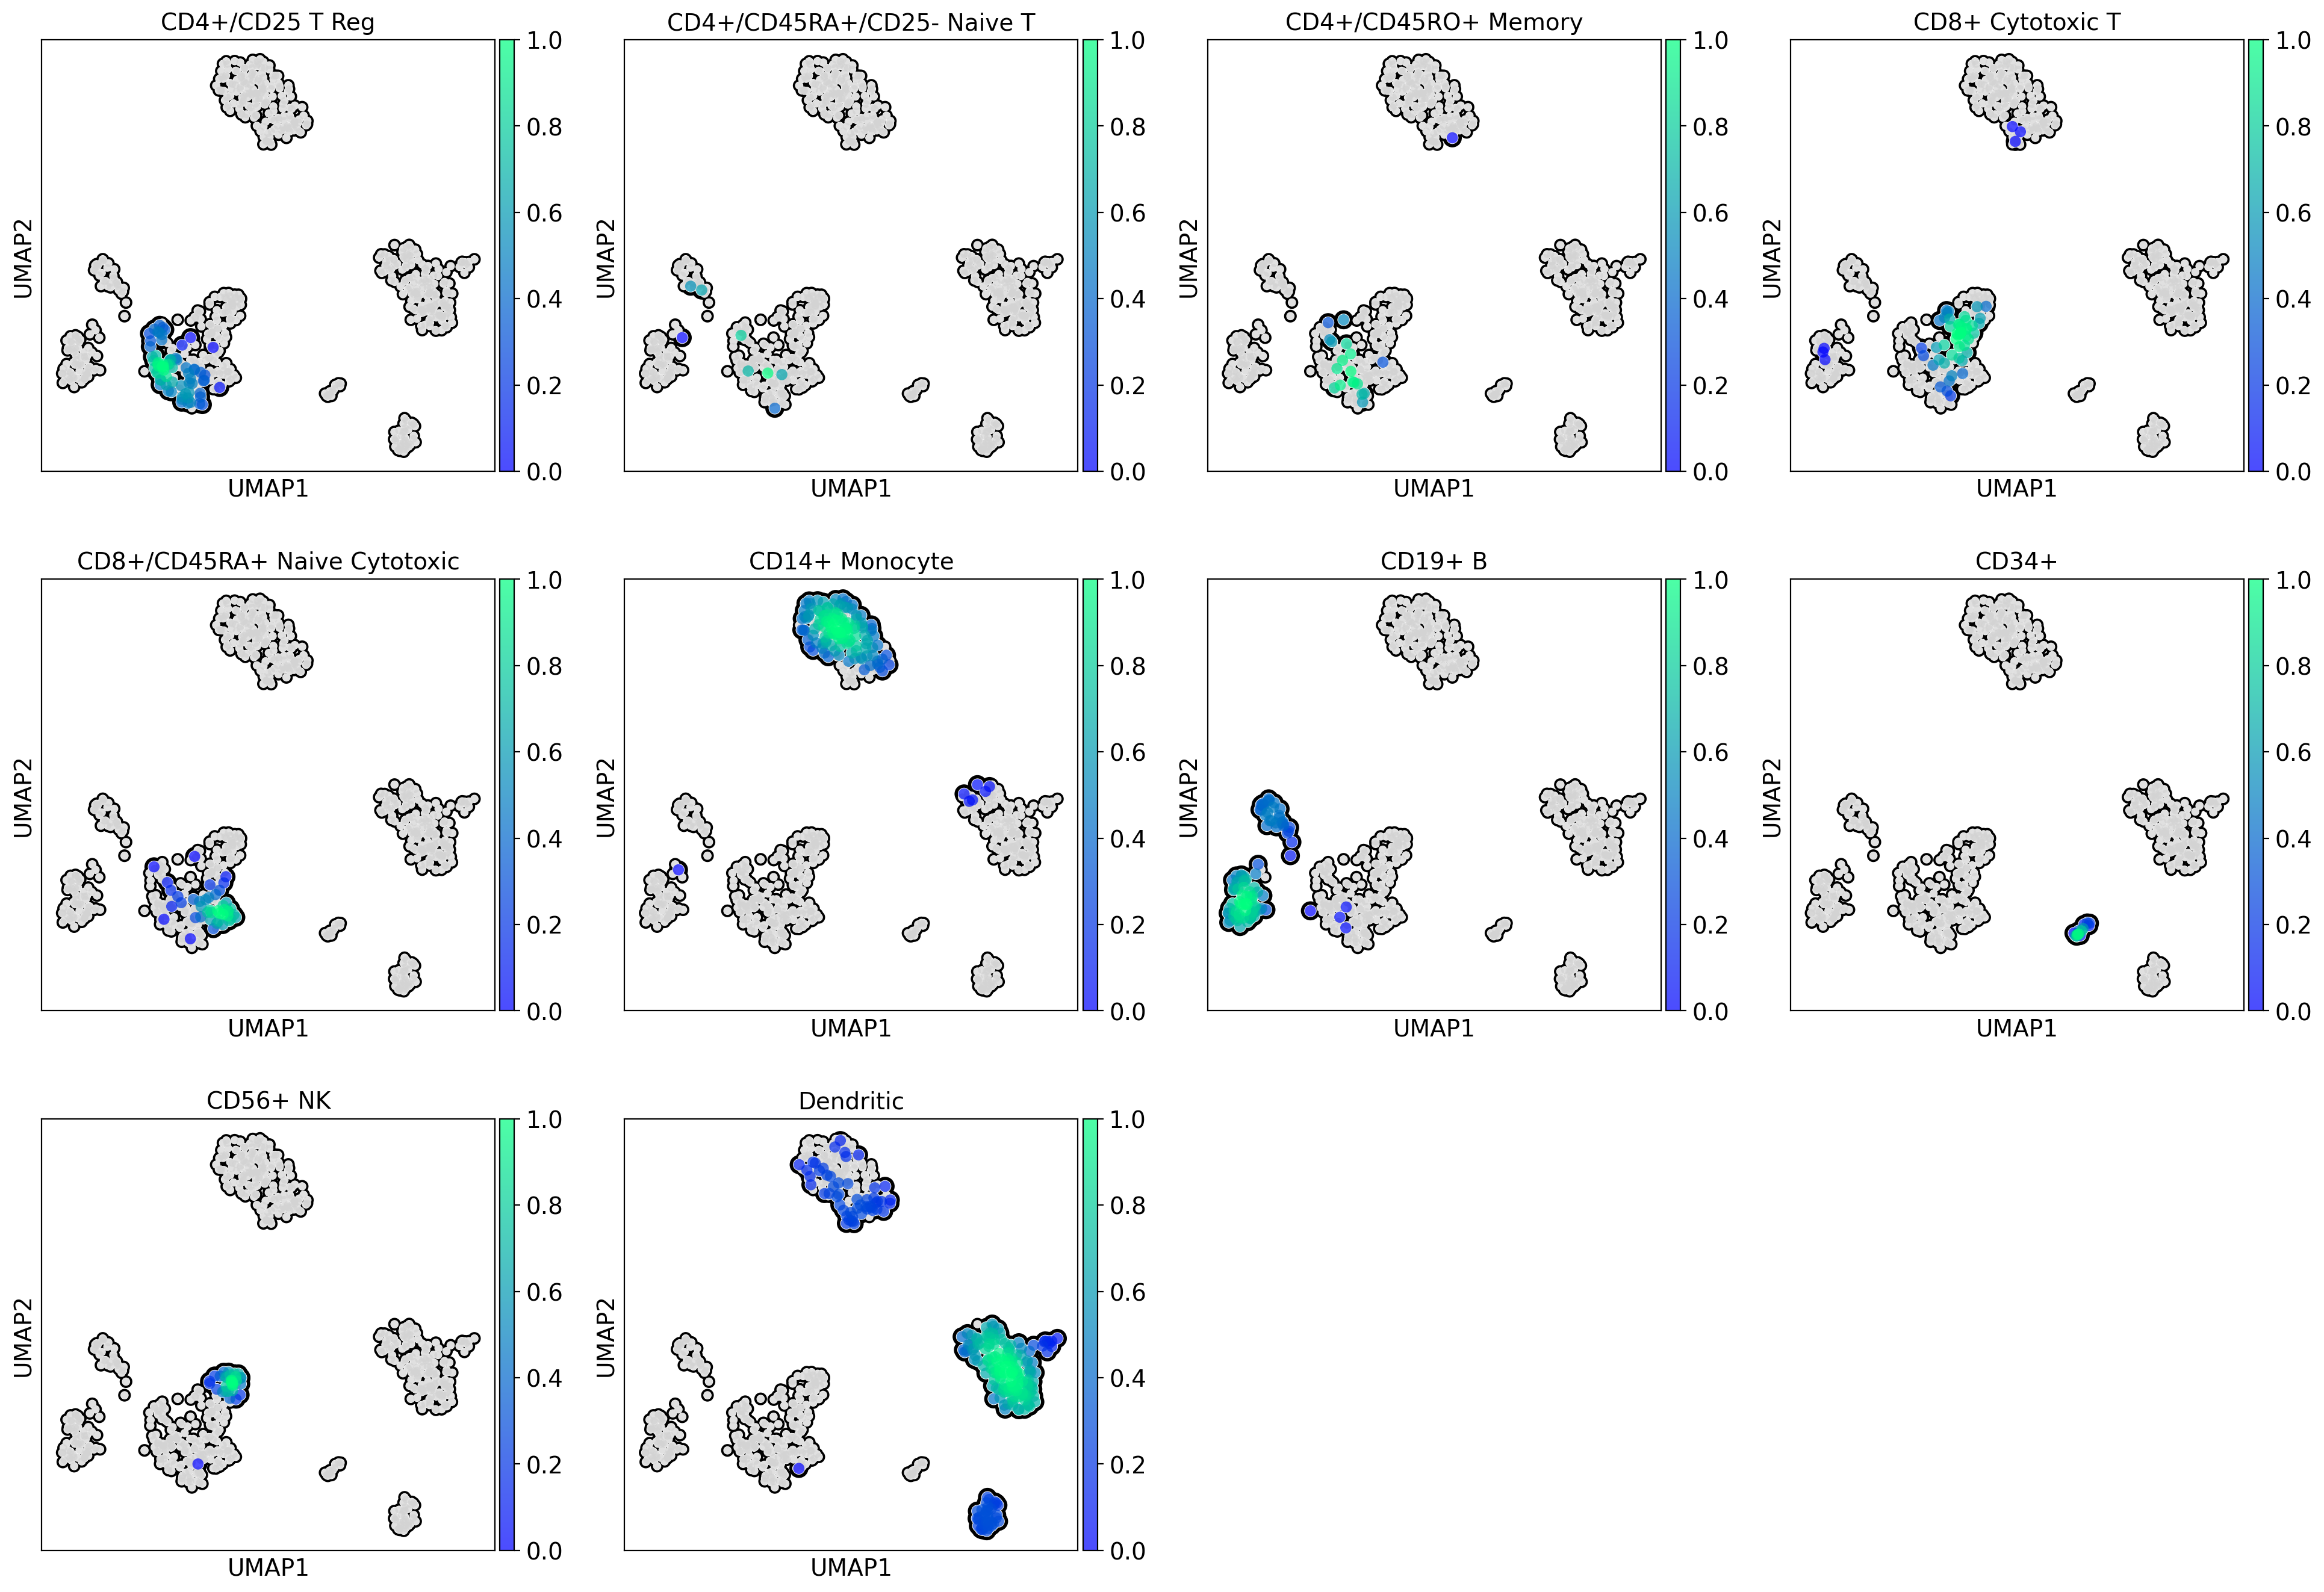

In [11]:
# 查看所有类型细胞在亚群中的密集度
sc.tl.embedding_density(pbmc,groupby='bulk_labels')
sc.pl.embedding_density(pbmc,groupby='bulk_labels',color_map='winter',add_outline=True)

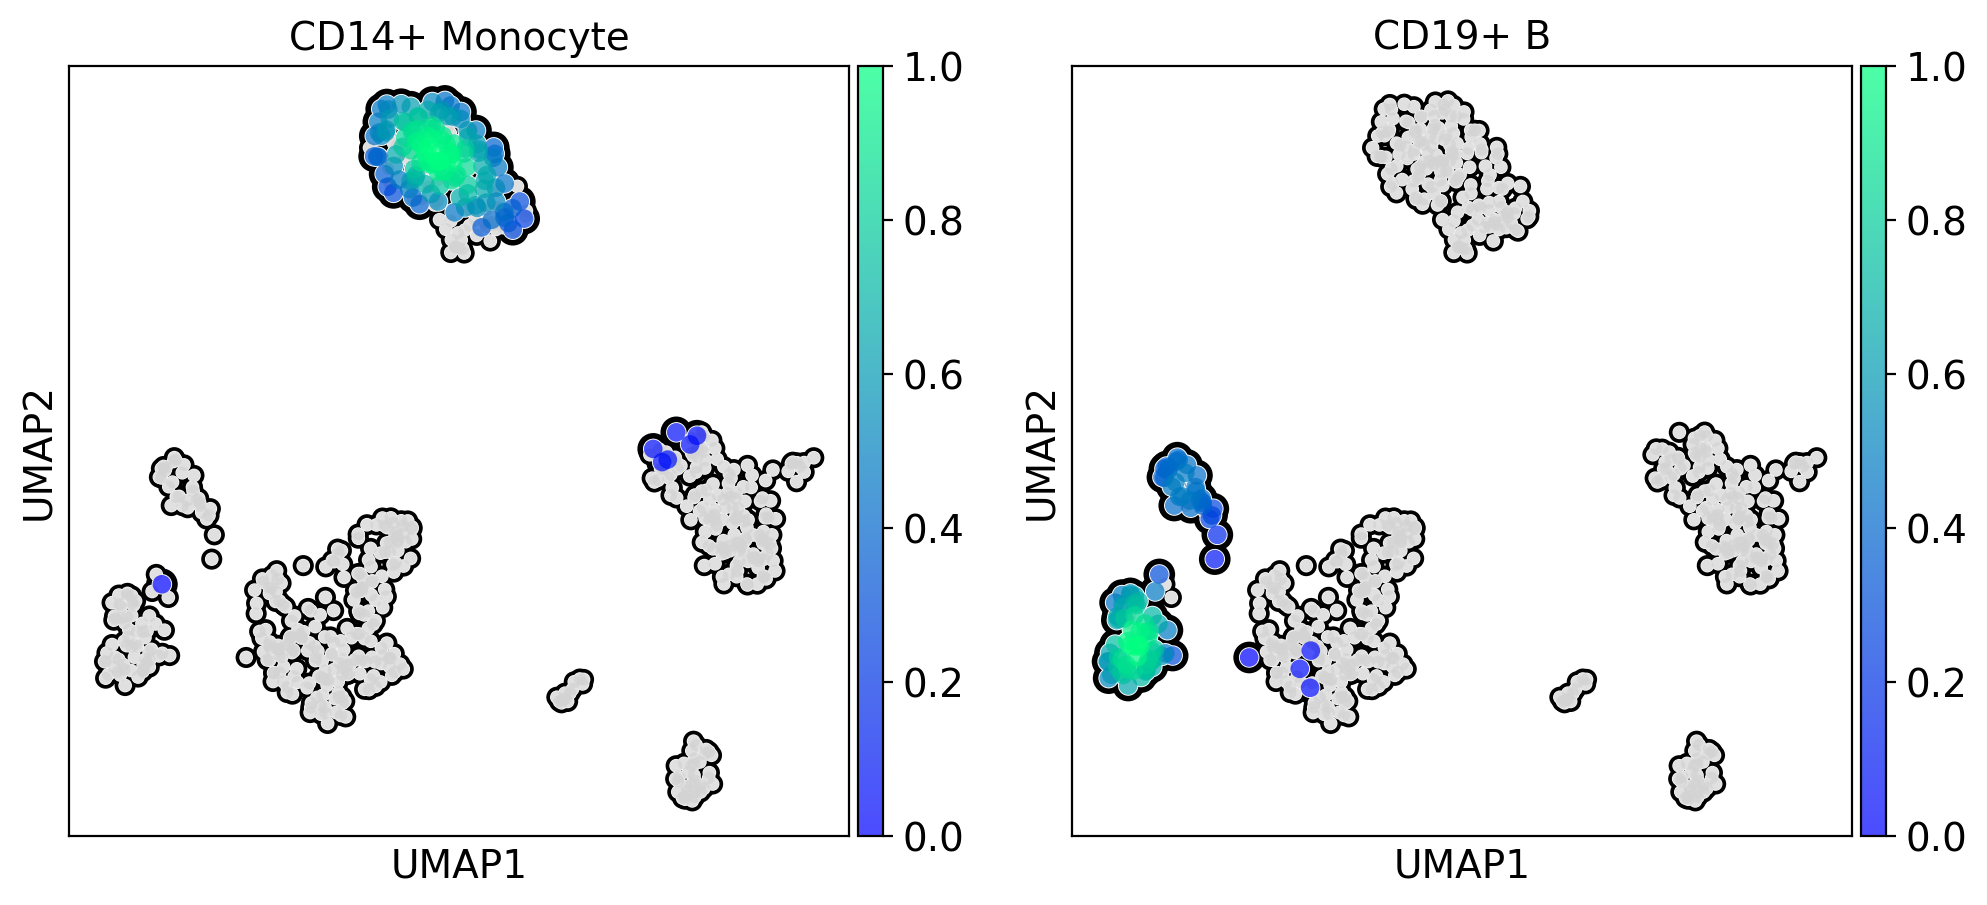

In [12]:
# 查看指定某种细胞类型在亚群中的密集度
sc.pl.embedding_density(pbmc,key='umap_density_bulk_labels',add_outline=True,color_map= 'winter',group=['CD14+ Monocyte','CD19+ B'])

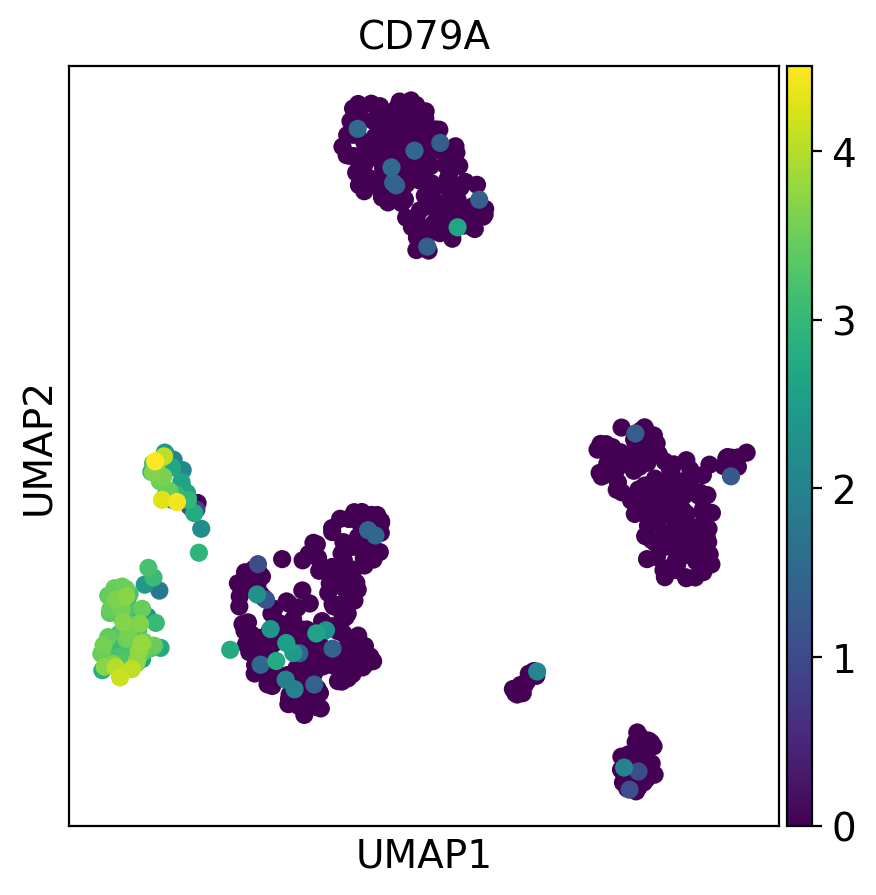

In [13]:
# 某基因的表达情况
sc.pl.umap(pbmc,color='CD79A')

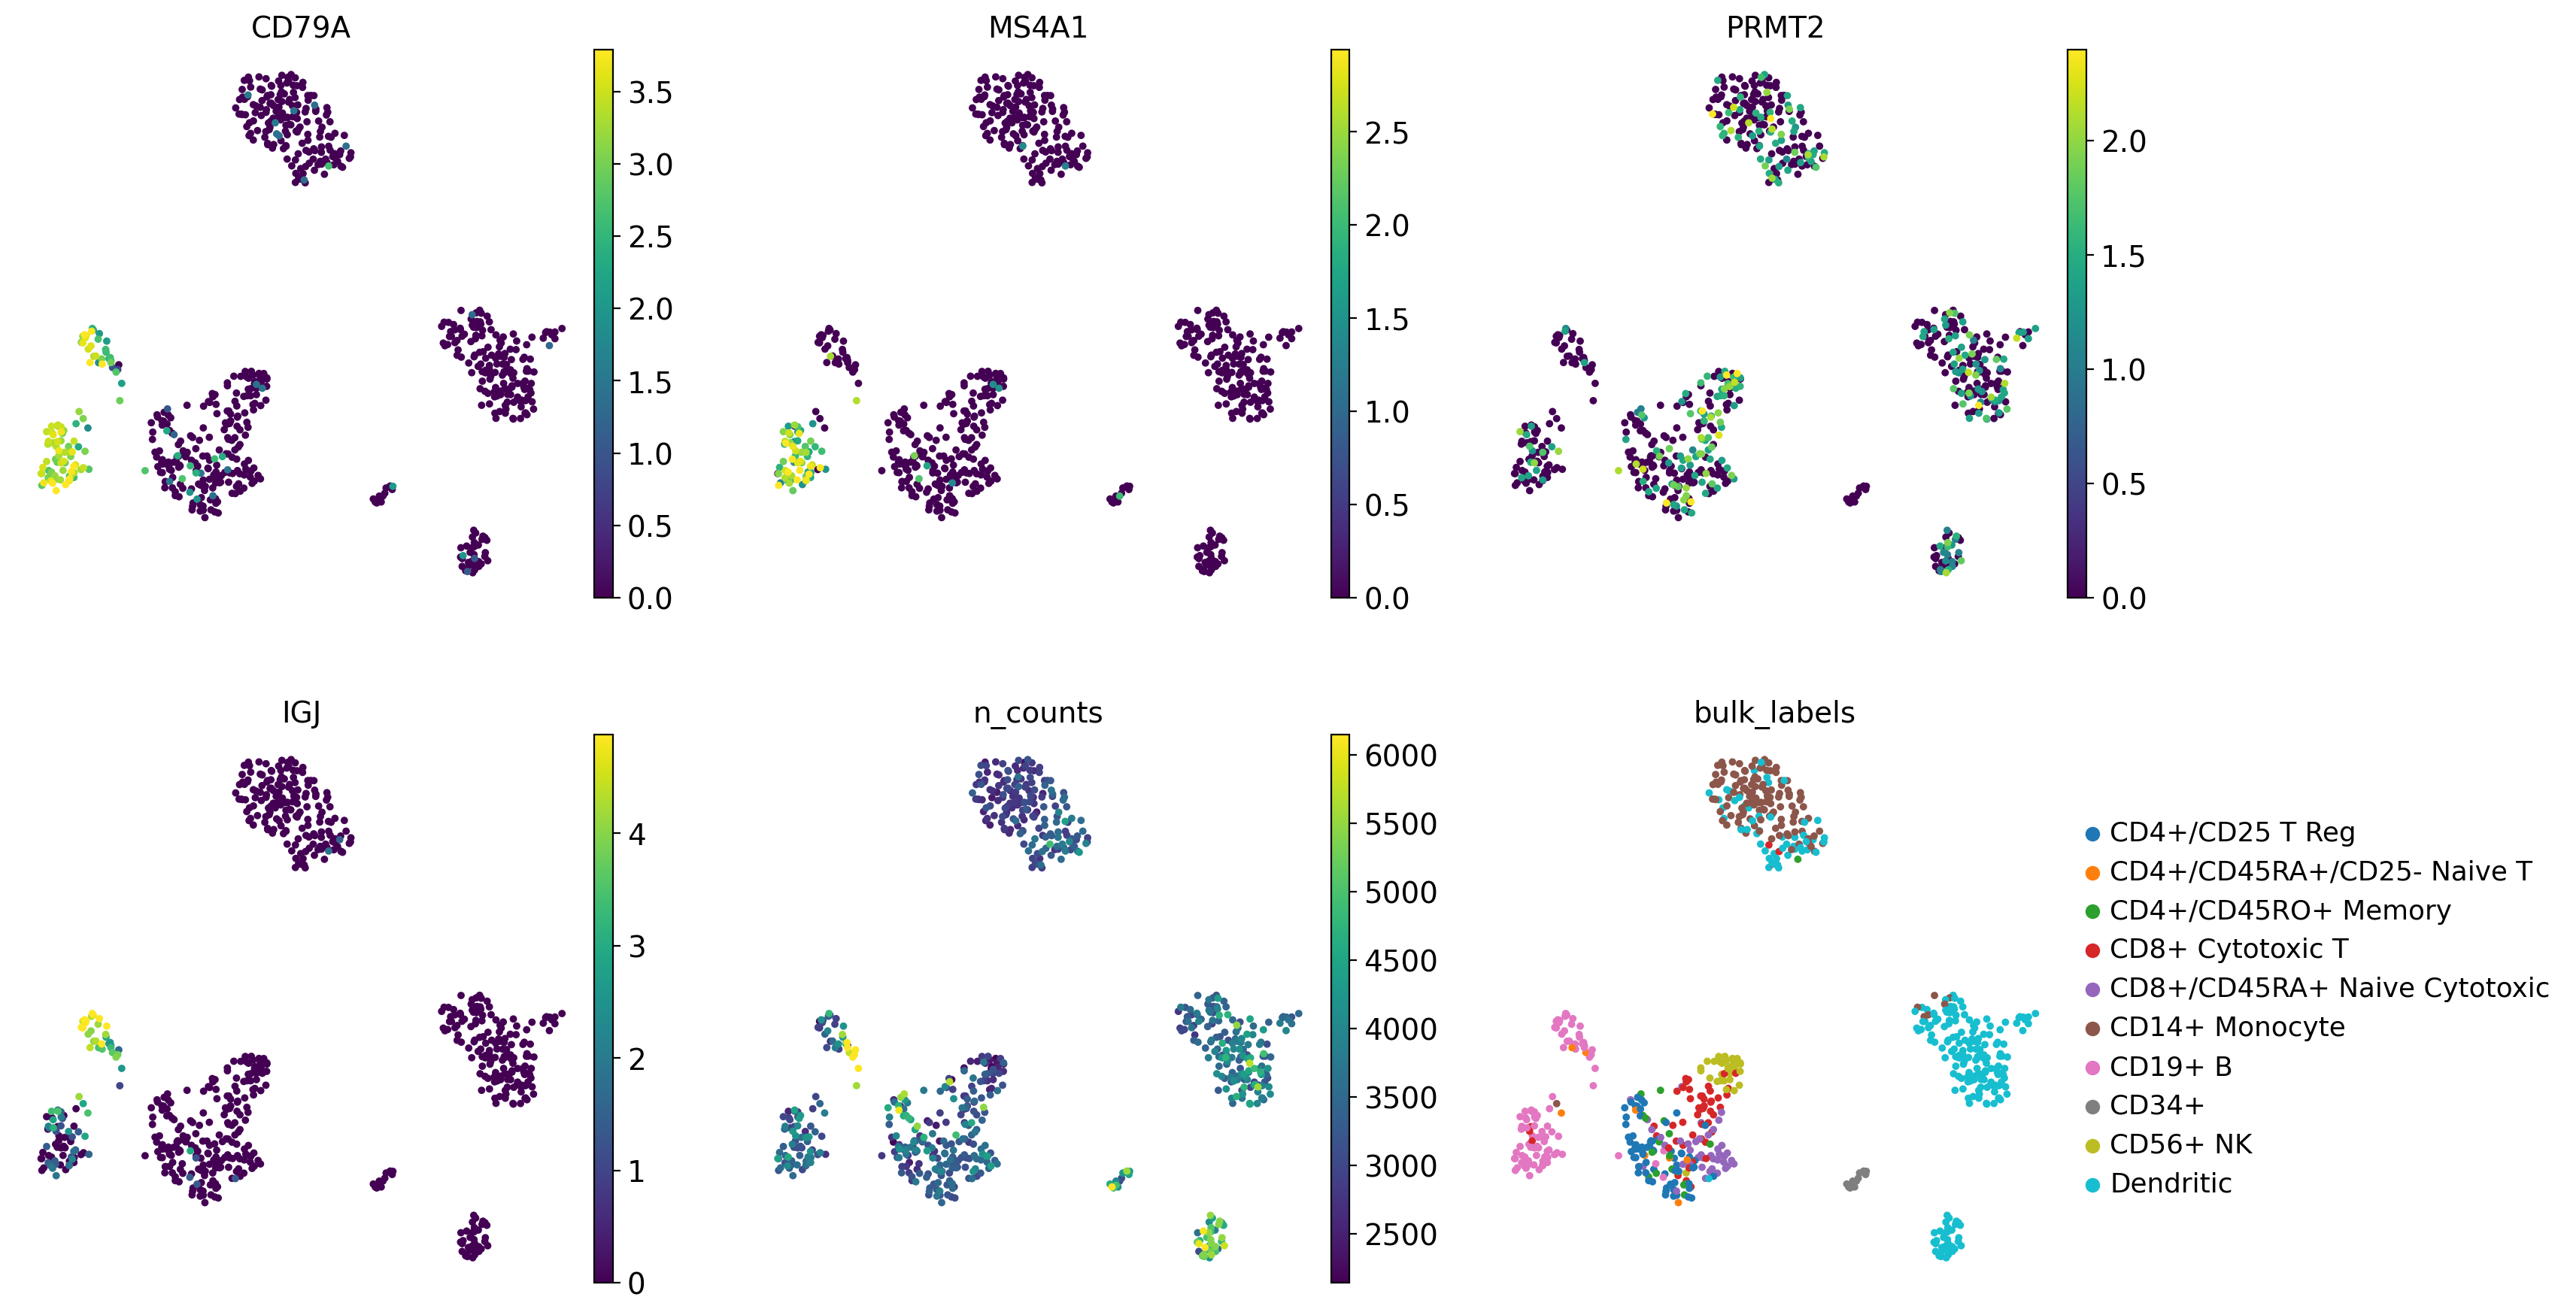

In [14]:
sc.pl.umap(pbmc,color=['CD79A','MS4A1','PRMT2','IGJ','n_counts','bulk_labels'],s=50,frameon=False,ncols=3,vmax='p99')

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


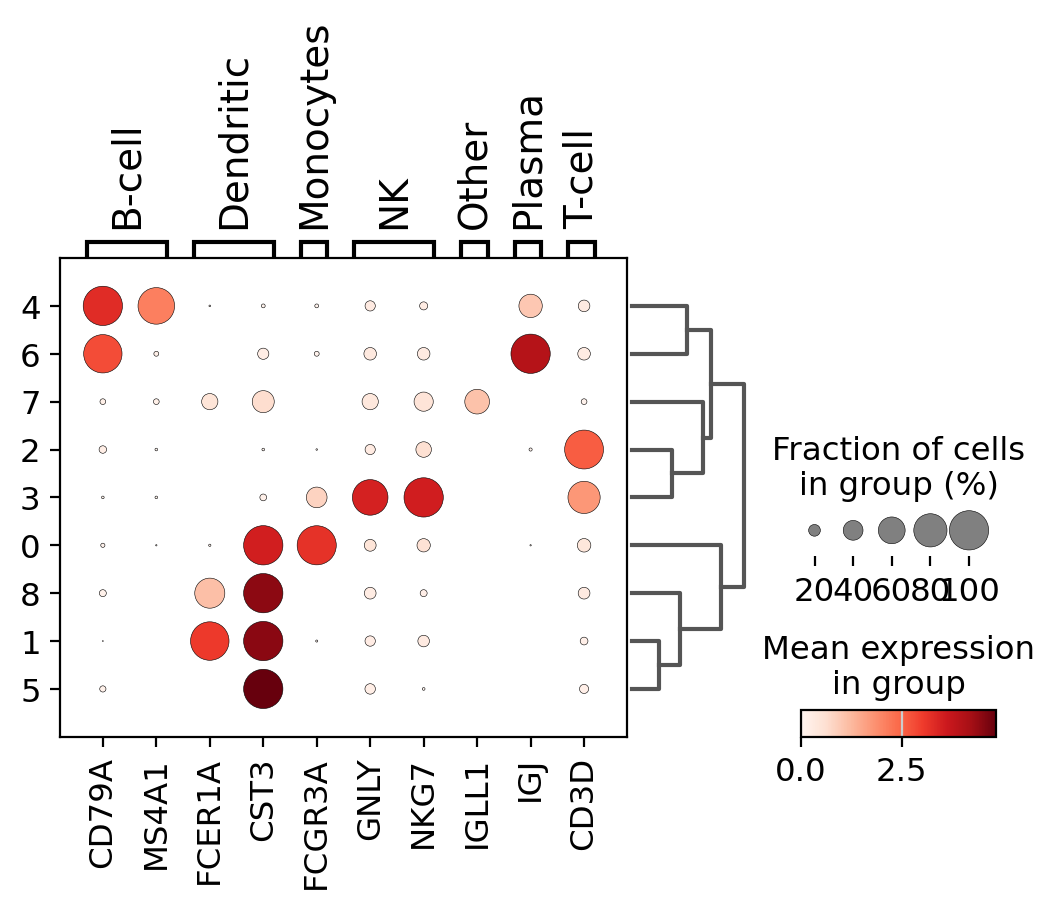

In [24]:
marker_genes_dict={
    'B-cell': ['CD79A','MS4A1'],
    'Dendritic': ['FCER1A', 'CST3'],
    'Monocytes': ['FCGR3A'],
    'NK': ['GNLY', 'NKG7'],
    'Other': ['IGLL1'],
    'Plasma': ['IGJ'],
    'T-cell': ['CD3D']
}
sc.tl.leiden(pbmc, key_added='clusters', resolution=0.5)
sc.pl.dotplot(pbmc, marker_genes_dict, 'clusters', dendrogram=True)

categories: B-cell, Dendritic, Monocytes, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


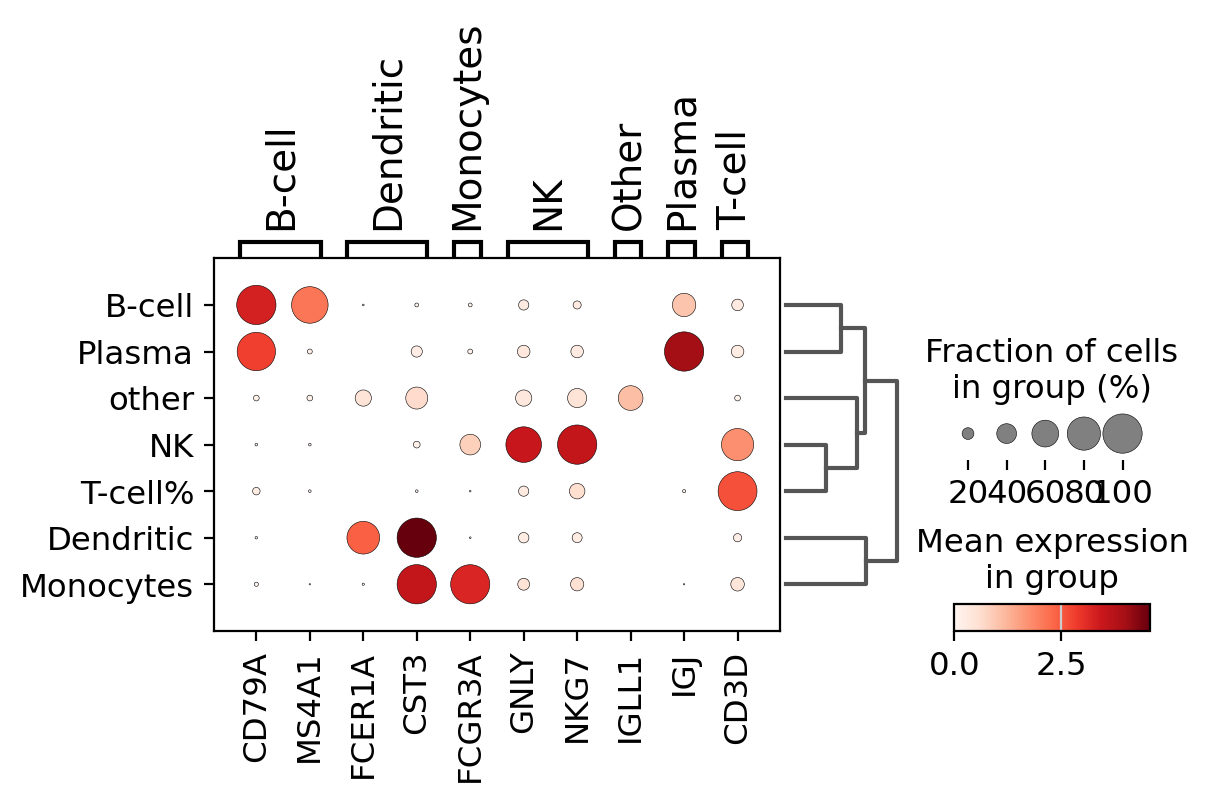

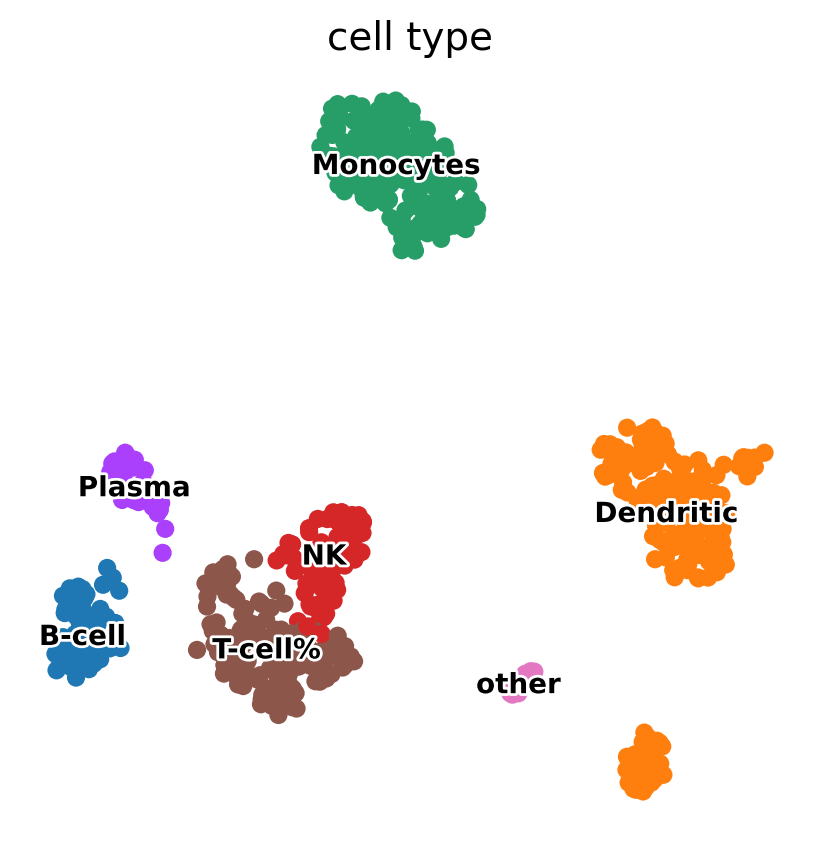

In [26]:
cluster2annotation ={
    '0': 'Monocytes',
    '1': 'Dendritic',
    '2': 'T-cell%',
    '3': 'NK',
    '4':'B-cell',
    '5': 'Dendritic',
    '6': 'Plasma',
    '7': 'other',
    '8': 'Dendritic'
}
pbmc.obs['cell type']=pbmc.obs['clusters'].map(cluster2annotation).astype('category')
sc.pl.dotplot(pbmc, marker_genes_dict, 'cell type',dendrogram=True)
sc.pl.umap(pbmc, color='cell type', legend_loc='on data',frameon=False,legend_fontsize=10, legend_fontoutline=2)

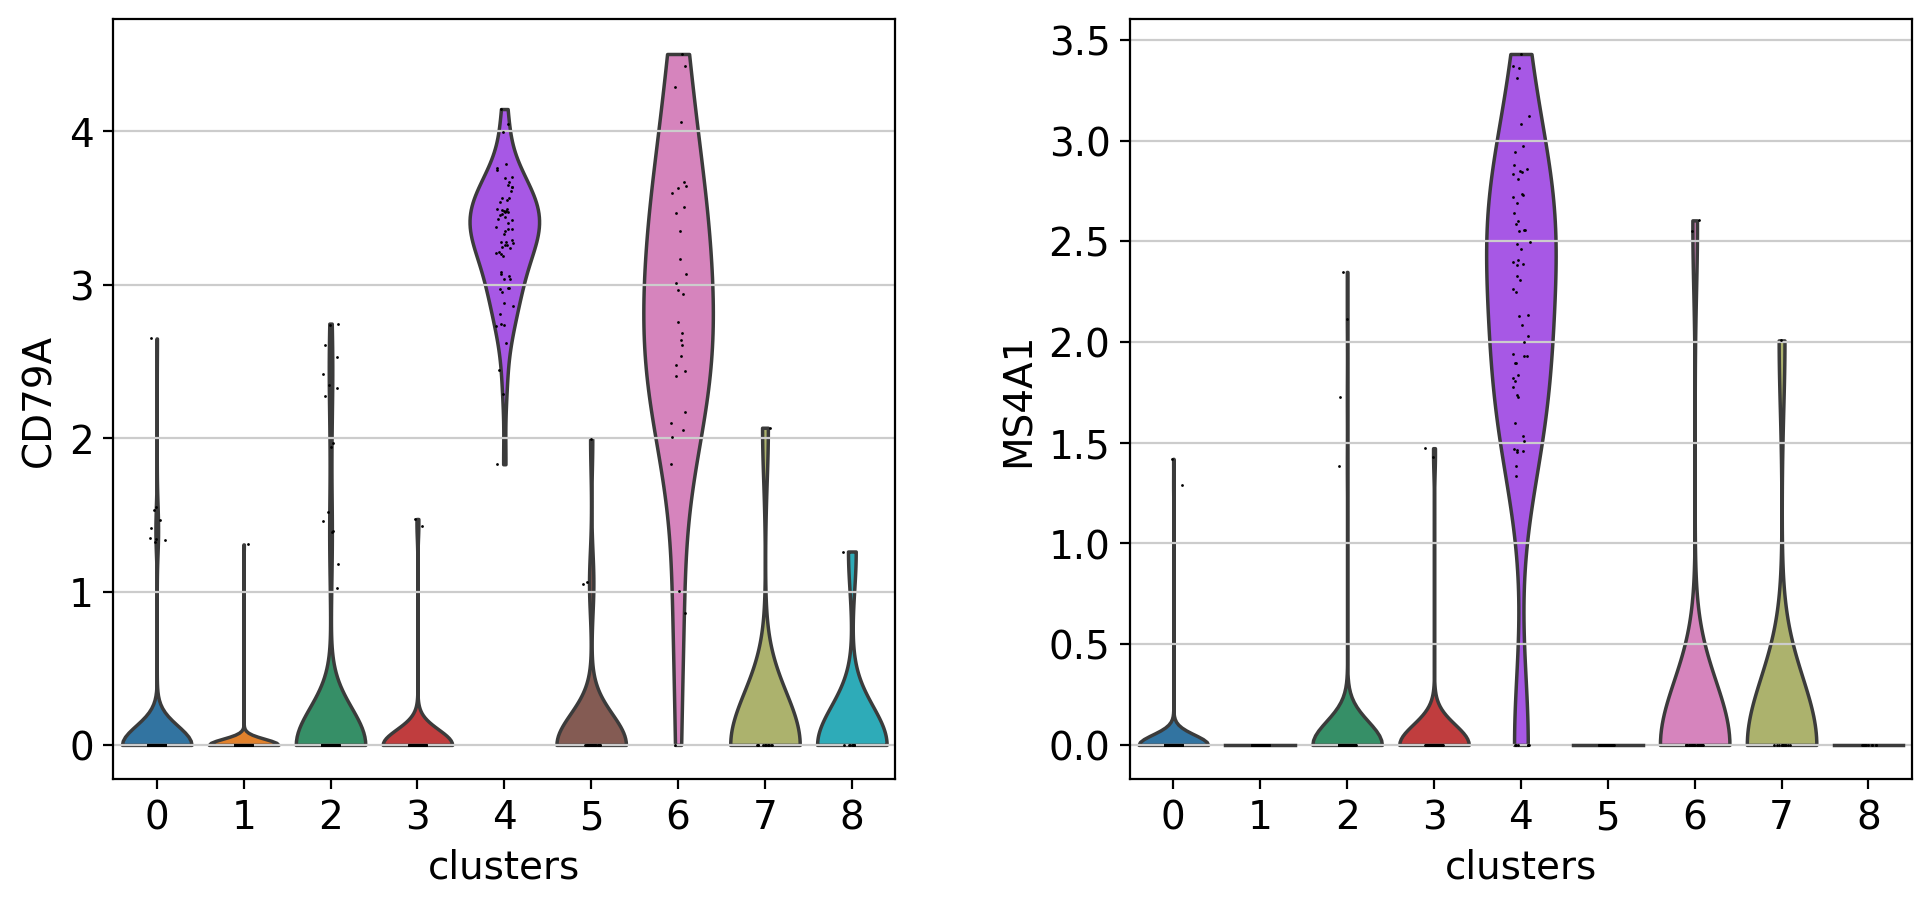

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


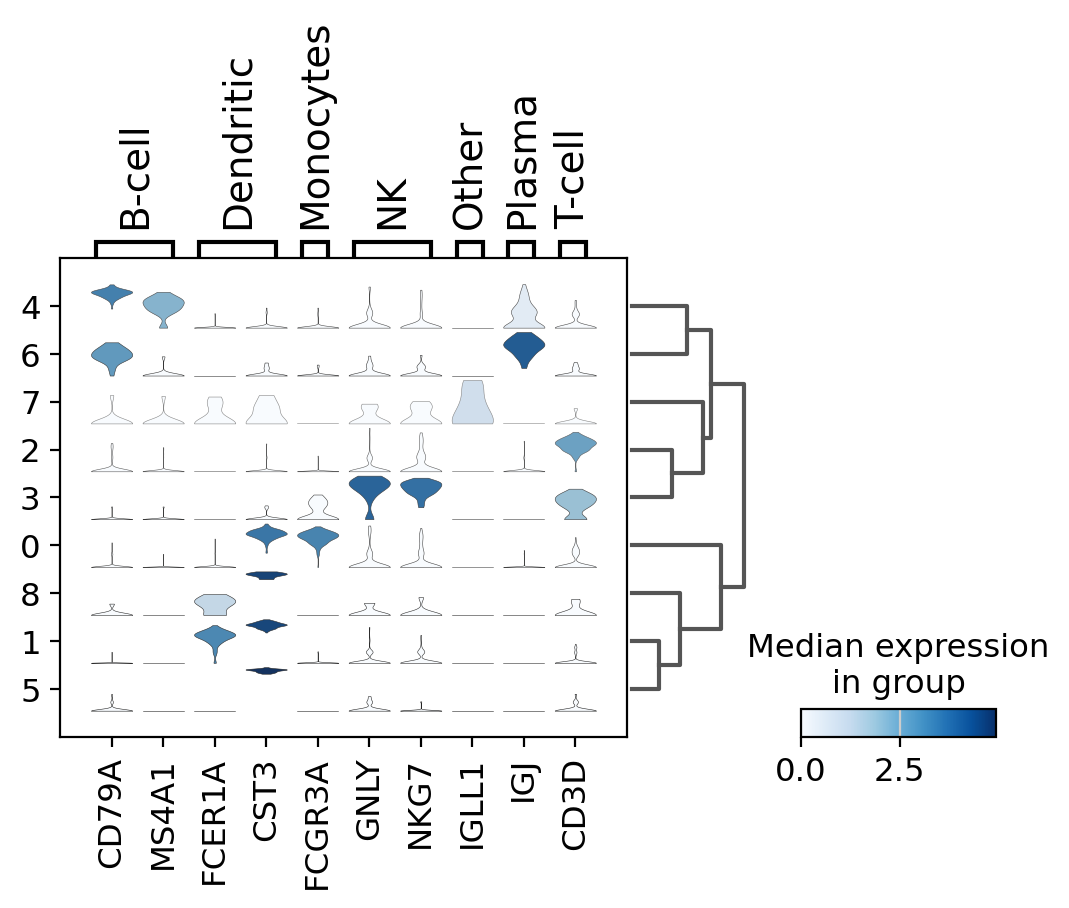

In [28]:
sc.pl.violin(pbmc, ['CD79A','MS4A1'], groupby='clusters')
             
ax = sc.pl.stacked_violin(pbmc, marker_genes_dict, groupby='clusters', swap_axes=False,dendrogram=True)

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


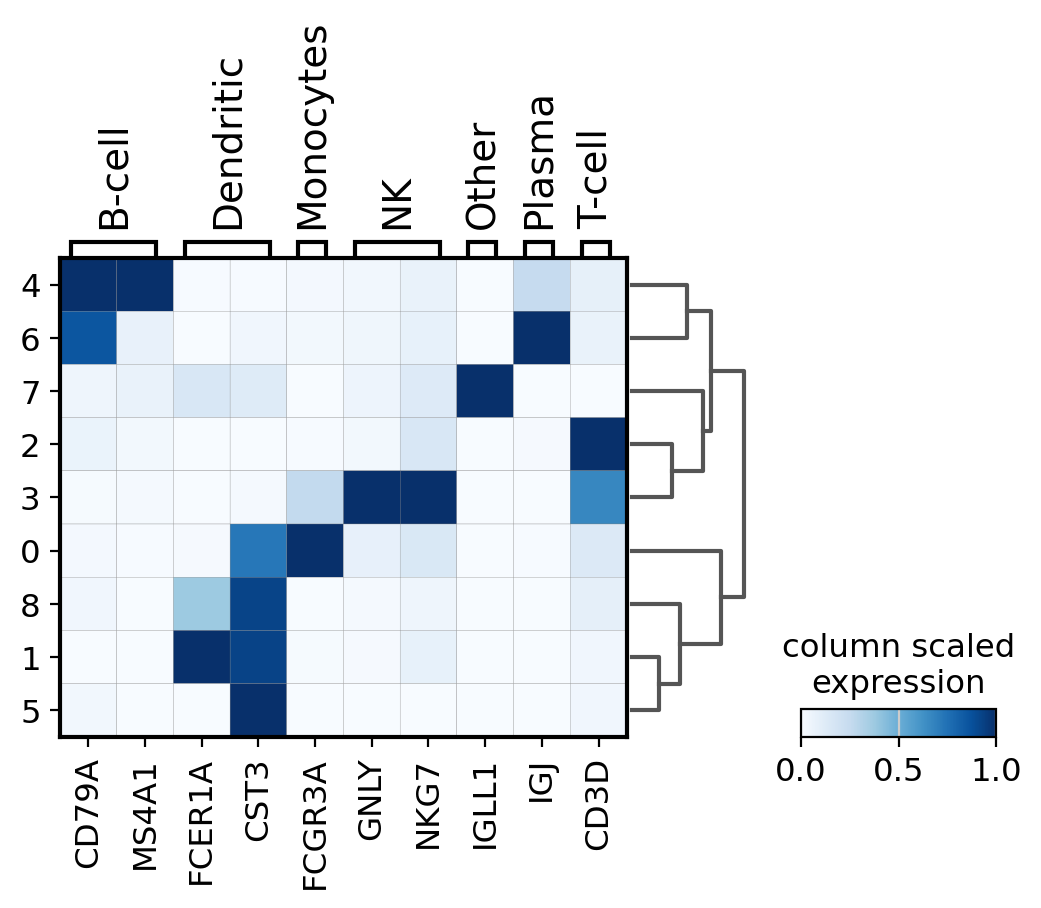

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


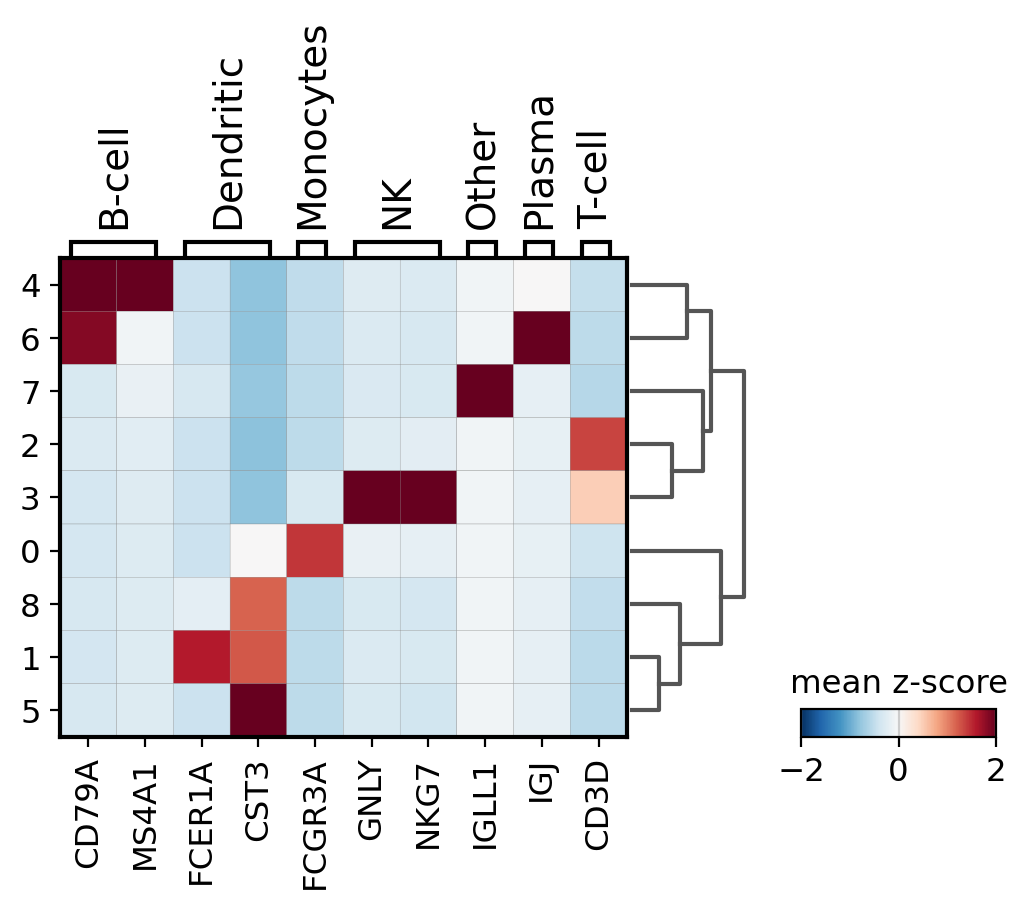

In [30]:
# standard
sc.pl.matrixplot(pbmc, marker_genes_dict, 'clusters', dendrogram=True, cmap='Blues',standard_scale='var', 
                 colorbar_title='column scaled\nexpression')
# z-score
pbmc.layers['scaled']=sc.pp.scale(pbmc, copy=True).X
sc.pl.matrixplot(pbmc, marker_genes_dict, 'clusters', dendrogram=True, colorbar_title='mean z-score',
                 layer='scaled',vmin=-2, vmax=2, cmap='RdBu_r')

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


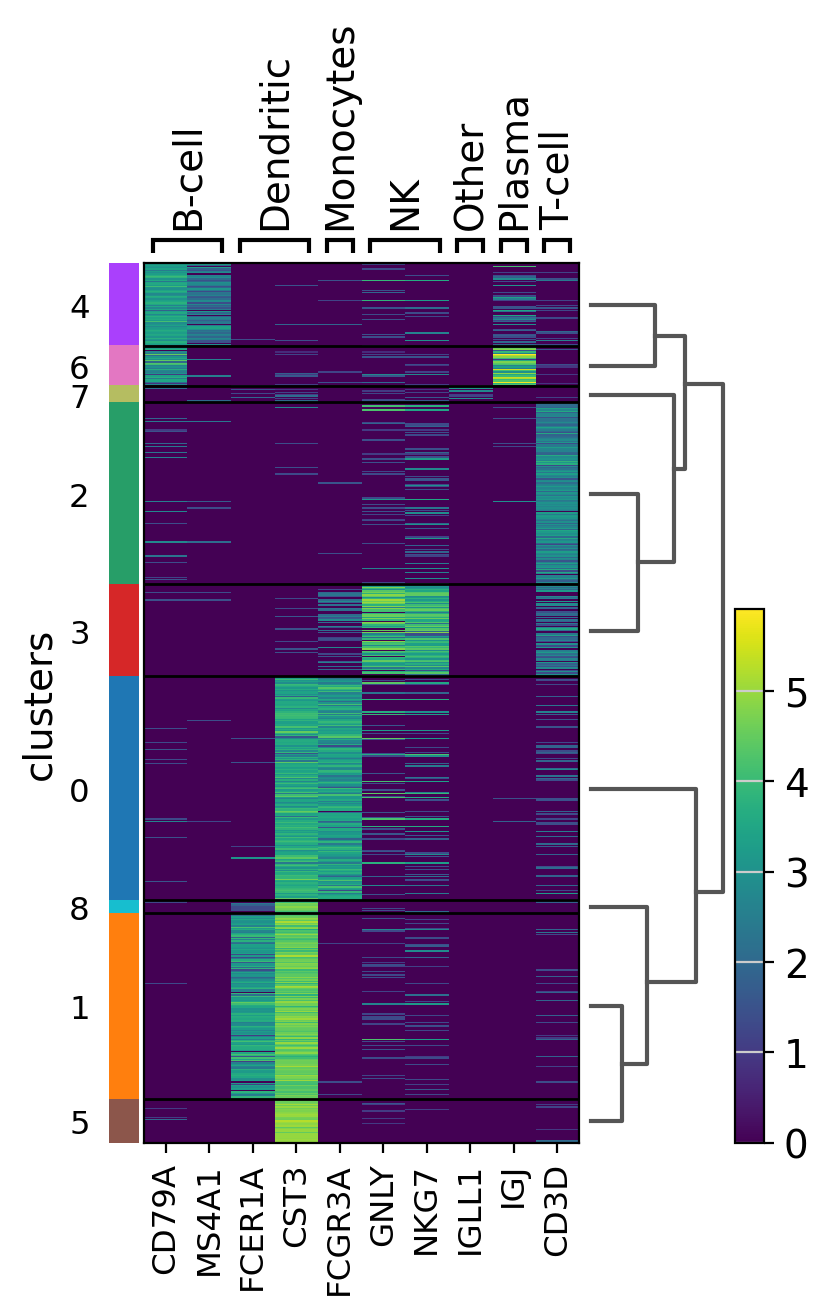

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


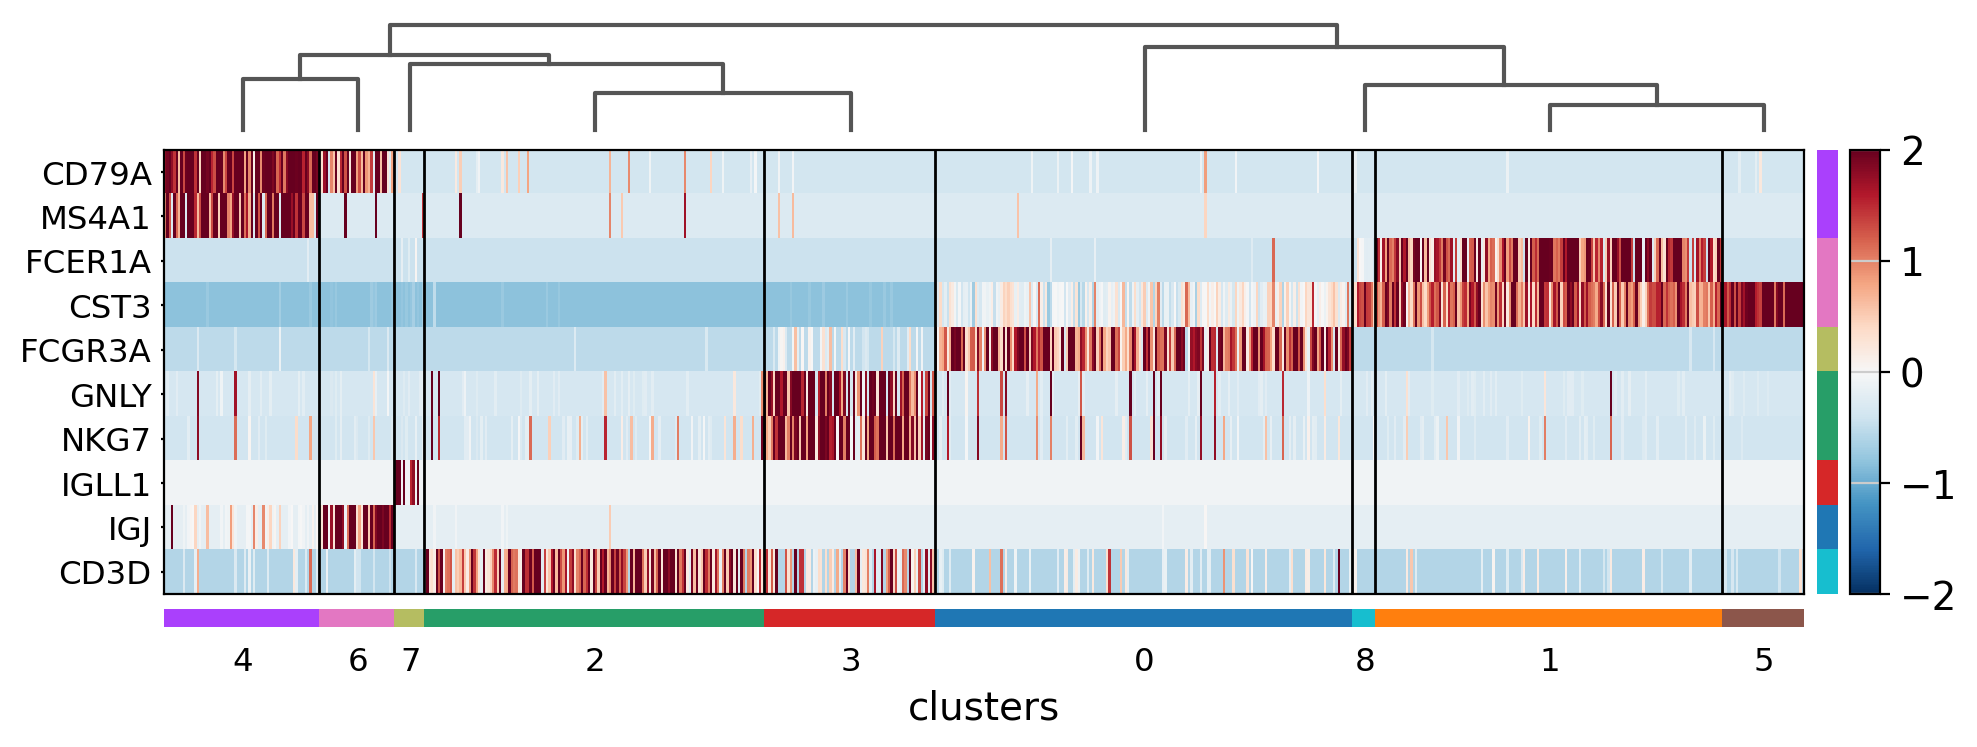

In [34]:
# 查看cluster中每一个细胞的表达情况
ax = sc.pl.heatmap(pbmc, marker_genes_dict, groupby='clusters',cmap='viridis', dendrogram=True)
# swap_axes 换坐标
ax = sc.pl.heatmap(pbmc, marker_genes_dict, groupby='clusters',layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r', dendrogram=True,swap_axes=True, figsize=(11,4))

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


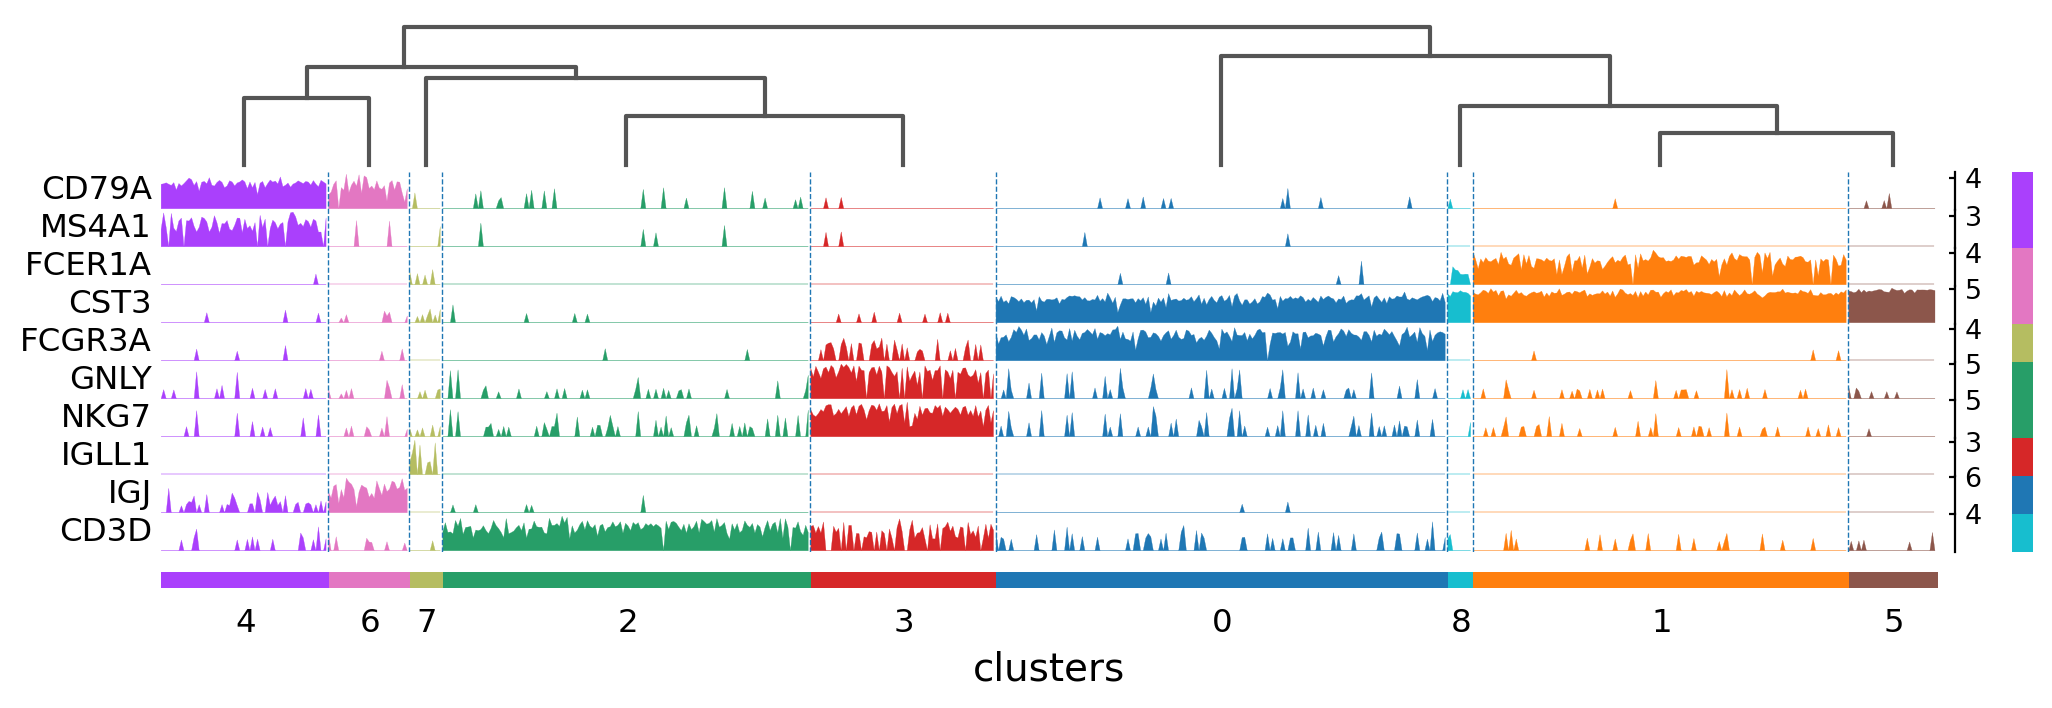

In [36]:
# 踪迹图
ax = sc.pl.tracksplot(pbmc, marker_genes_dict, groupby='clusters', dendrogram=True)

### 差异基因展示

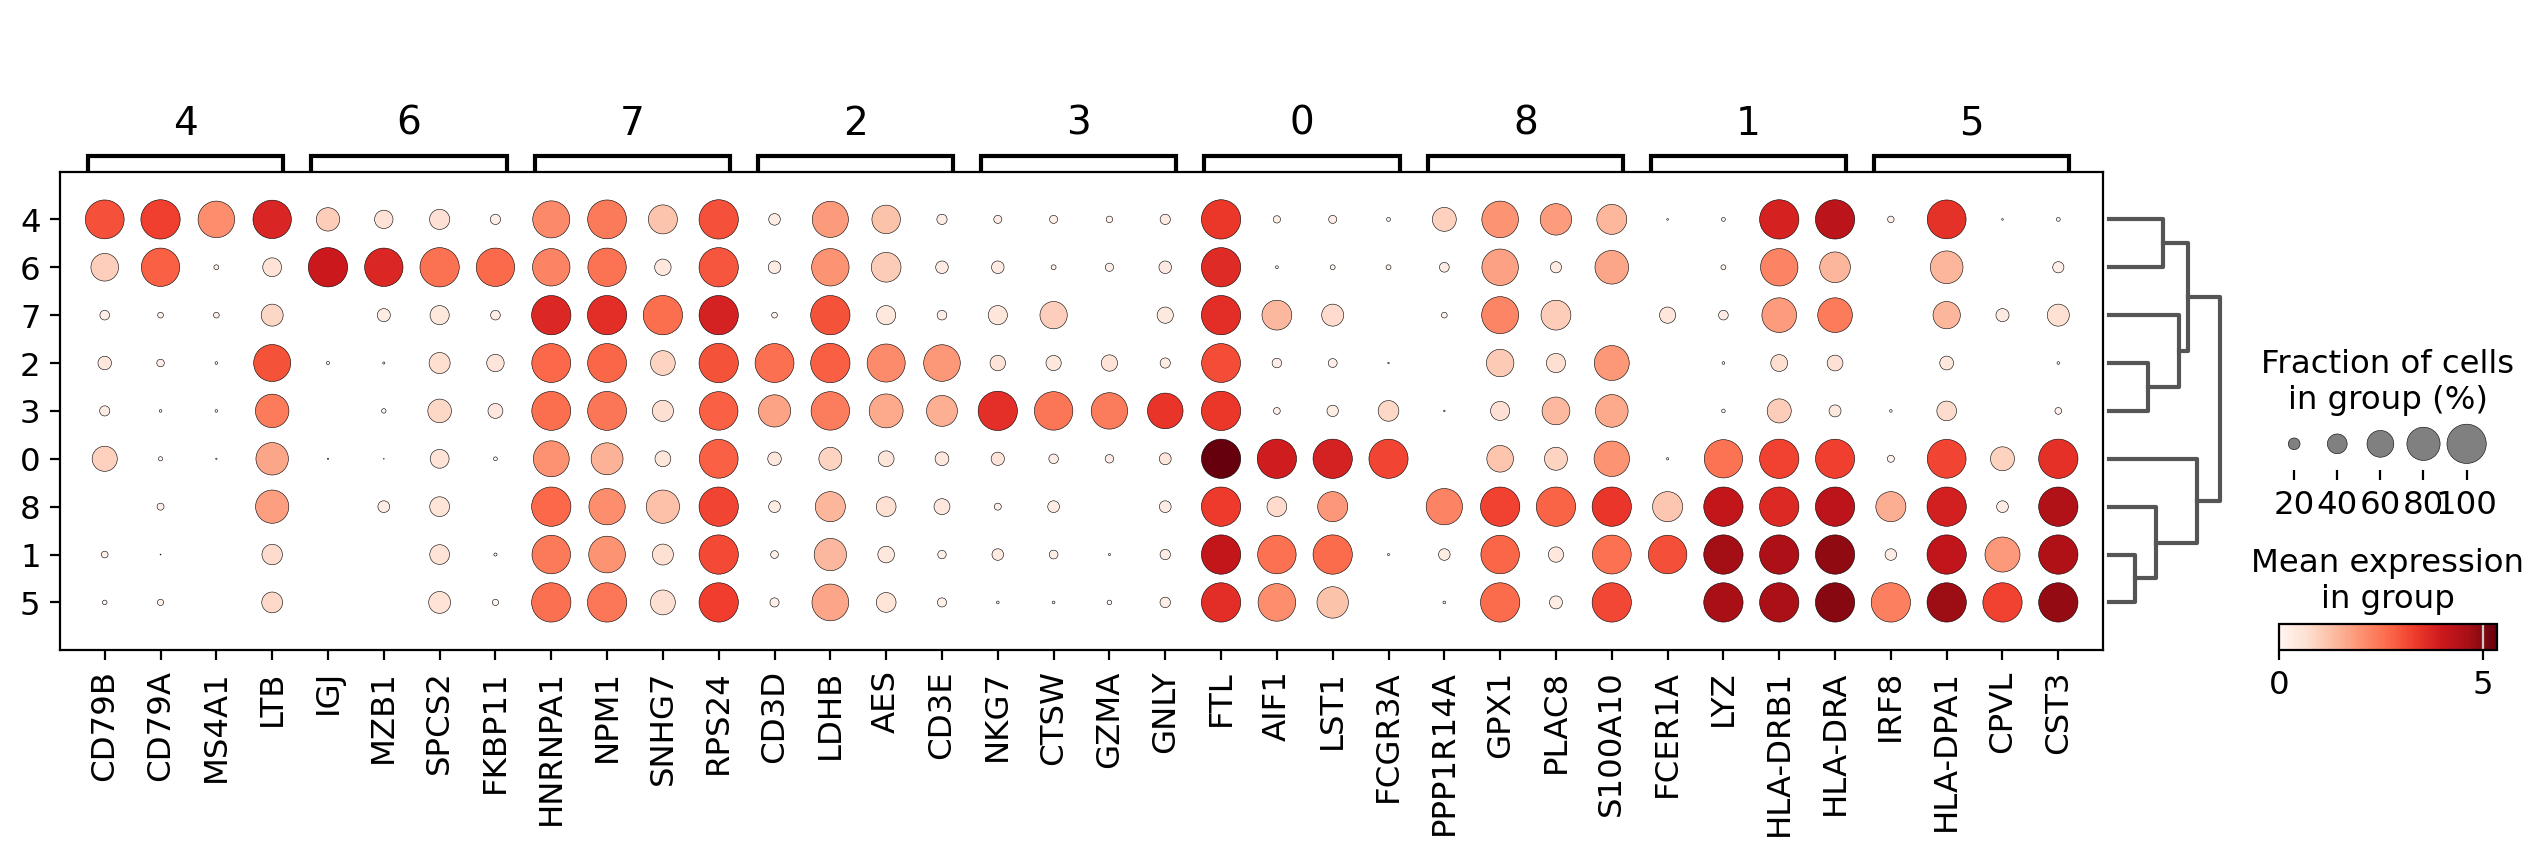

In [38]:
# 计算差异基因
sc.tl.rank_genes_groups(pbmc, groupby='clusters', method='wilcoxon')
# 
sc.pl.rank_genes_groups_dotplot(pbmc,n_genes=4)

/data/lwb/miniconda3/envs/Scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/__init__.py:1303: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


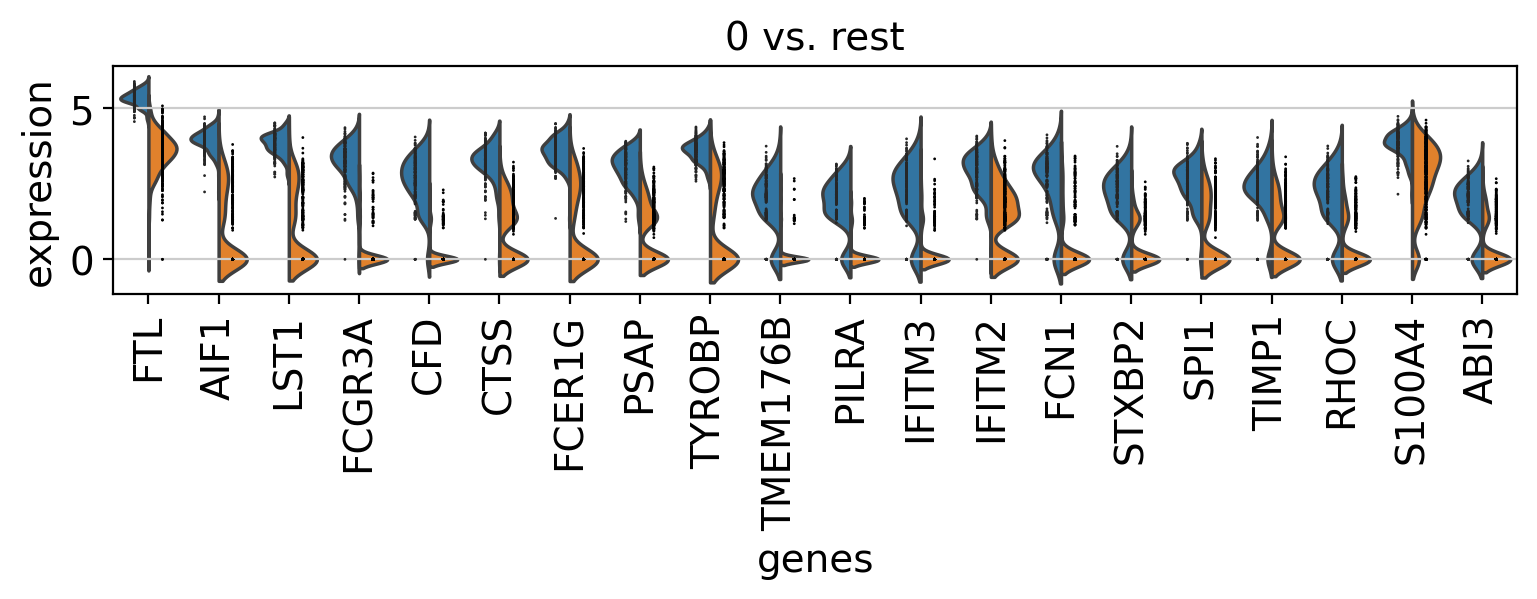

In [39]:
with plt.rc_context({'figure.figsize': (9, 1.5)}):
    # 第0组 与 剩下所有对比
    sc.pl.rank_genes_groups_violin(pbmc,n_genes=20, groups=['0'], jitter=False)

### 聚类树

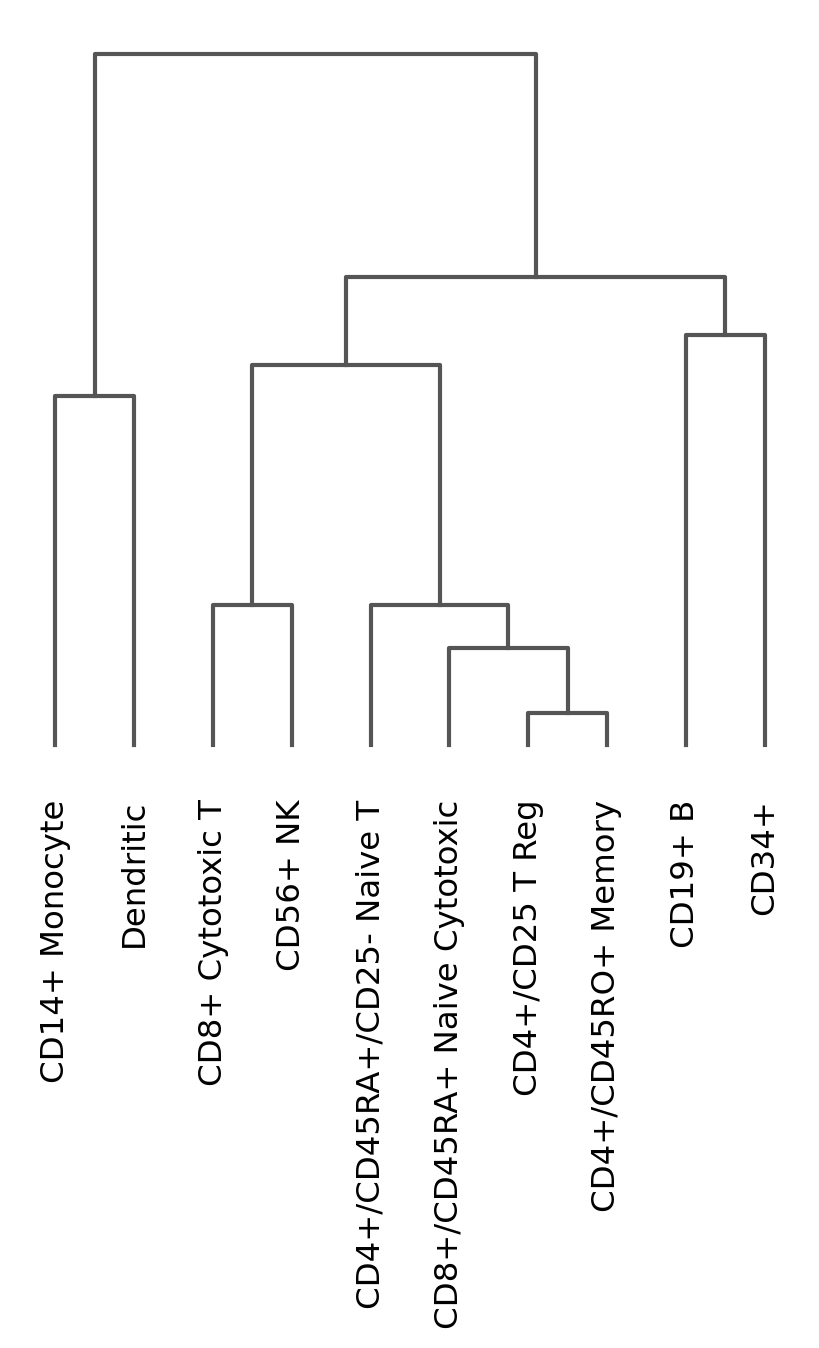

In [40]:
sc.tl.dendrogram(pbmc,'bulk_labels')
ax = sc.pl.dendrogram(pbmc,'bulk_labels')

### 相关性展示

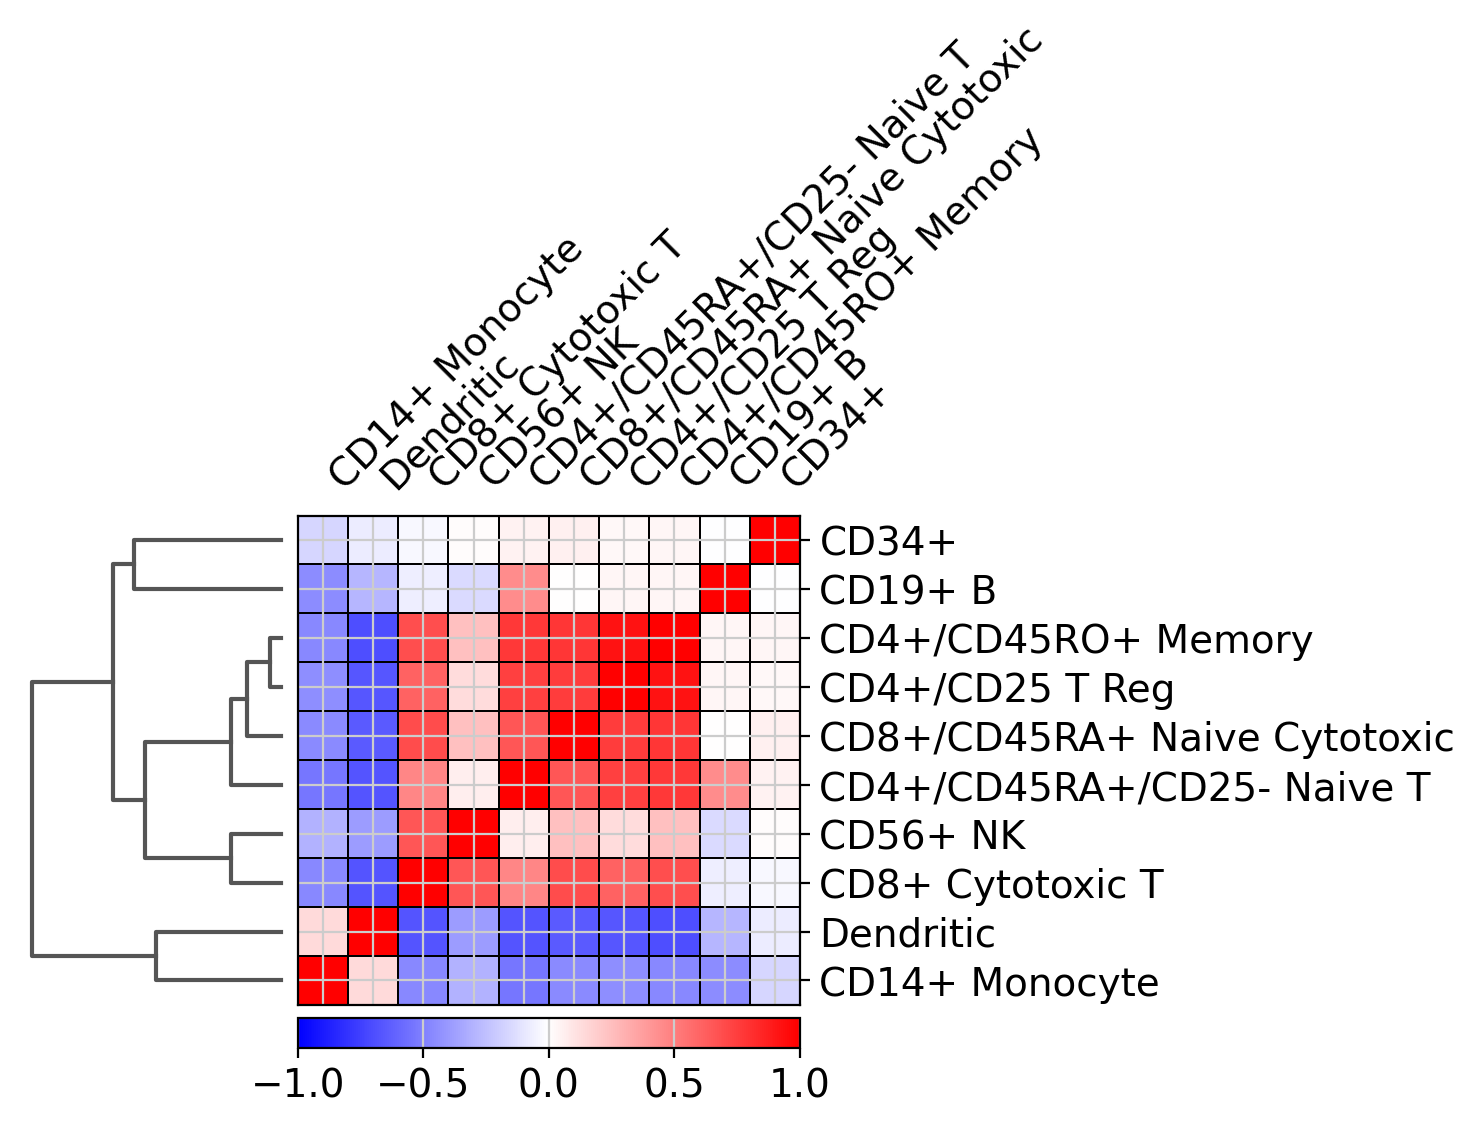

In [43]:
ax =sc.pl.correlation_matrix(pbmc, 'bulk_labels', figsize=(5,3.5))